# KNN with K-fold cross validation and hyperparameter tuning

Shape of iris:  <class 'sklearn.utils._bunch.Bunch'> 150 4
shape of X_train & y_train:  120 30
Best k: 12
Test set accuracy: 100.00%
k_scores are:  30 [0.9416666666666667, 0.925, 0.9416666666666667, 0.9166666666666666, 0.95, 0.9416666666666667, 0.95, 0.95, 0.9416666666666668, 0.95, 0.9583333333333333, 0.9666666666666666, 0.95, 0.95, 0.95, 0.9416666666666668, 0.95, 0.9416666666666668, 0.9416666666666668, 0.9166666666666666, 0.925, 0.9333333333333333, 0.9333333333333333, 0.9416666666666668, 0.95, 0.9416666666666668, 0.9416666666666668, 0.9416666666666668, 0.9416666666666668, 0.925]


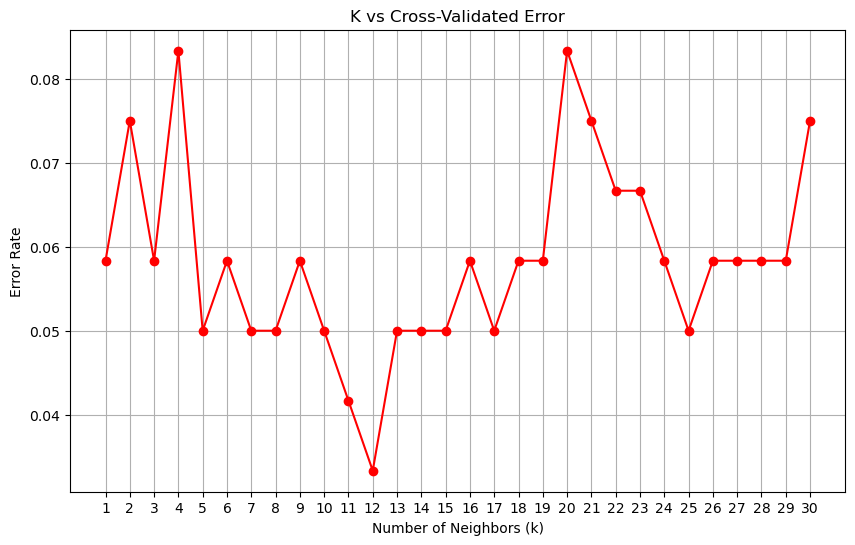

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

print("Shape of iris: ", type(iris), len(X), len(X[0]))

# Split into train and test (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("shape of X_train & y_train: ", len(X_train), len(X_test))

# Define range of k values to test
k_values = range(1, 31)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_k = None
best_score = 0
k_scores = []

# Manual hyperparameter tuning
for k in k_values:
    fold_accuracies = []
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_fold_train, y_fold_train)
        preds = model.predict(X_fold_val)
        acc = accuracy_score(y_fold_val, preds)
        fold_accuracies.append(acc)
    
    avg_accuracy = np.mean(fold_accuracies)
    k_scores.append(avg_accuracy)
    
    if avg_accuracy > best_score:
        best_score = avg_accuracy
        best_k = k

# Final training and testing
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Best k: {best_k}")
print(f"Test set accuracy: {test_accuracy:.2f}%")

print("k_scores are: ", len(k_scores), k_scores)

import matplotlib.pyplot as plt

# Calculate errors
errors = [1 - acc for acc in k_scores]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='-', color='red')
plt.title('K vs Cross-Validated Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# KNN with K-fold cross validation and Grid Search

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

print("Shape of iris: ", type(iris), len(X), len(X[0]))

# Step 2: Split data into train and unseen test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("shape of X_train & y_train: ", len(X_train), len(X_test))

# Step 3: Define KNN model and parameter grid
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 31))}

# Step 4: Set up K-Fold Cross Validation and GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 5: Best model and parameters
print("Best parameters found:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

# Step 6: Predict on unseen data (X_test)
y_pred = best_knn.predict(X_test)

# Step 7: Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred)*100, "%")

Shape of iris:  <class 'sklearn.utils._bunch.Bunch'> 150 4
shape of X_train & y_train:  120 30
Best parameters found: {'n_neighbors': 12}
Accuracy on test set: 100.0 %


# KNN(metric='manhattan') with K-fold cross validation and hyperparameter tuning

Shape of iris:  <class 'sklearn.utils._bunch.Bunch'> 150 4
shape of X_train & y_train:  120 30
Best k: 13
Test set accuracy: 100.00%
k_scores are:  30 [0.925, 0.9083333333333332, 0.9416666666666667, 0.925, 0.9333333333333332, 0.9333333333333332, 0.9333333333333332, 0.9333333333333332, 0.95, 0.95, 0.9583333333333333, 0.9583333333333333, 0.9666666666666666, 0.95, 0.95, 0.95, 0.9583333333333334, 0.9416666666666668, 0.9416666666666668, 0.9416666666666668, 0.9416666666666668, 0.9416666666666668, 0.9333333333333332, 0.9333333333333332, 0.9416666666666668, 0.925, 0.925, 0.9166666666666667, 0.9416666666666668, 0.9083333333333332]


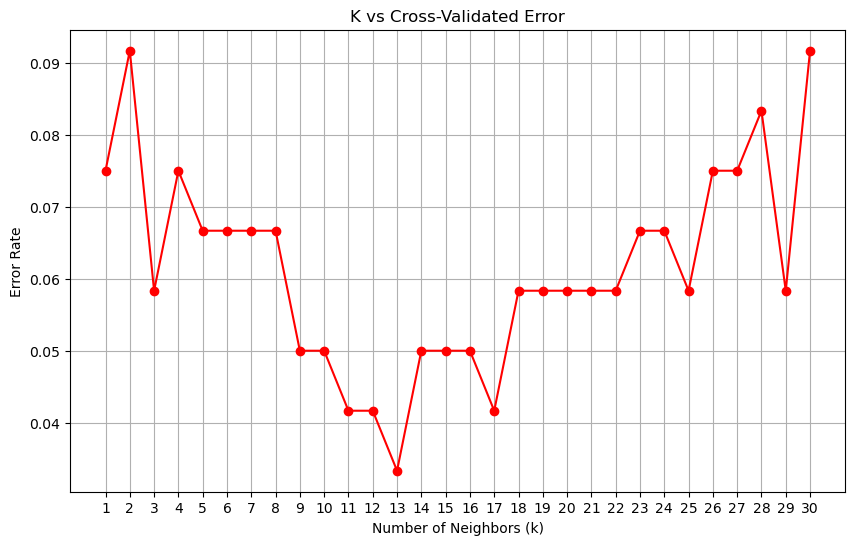

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

print("Shape of iris: ", type(iris), len(X), len(X[0]))

# Split into train and test (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("shape of X_train & y_train: ", len(X_train), len(X_test))

# Define range of k values to test
k_values = range(1, 31)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_k = None
best_score = 0
k_scores = []

# Manual hyperparameter tuning
for k in k_values:
    fold_accuracies = []
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # model = KNeighborsClassifier(n_neighbors=k)
        model = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
        model.fit(X_fold_train, y_fold_train)
        preds = model.predict(X_fold_val)
        acc = accuracy_score(y_fold_val, preds)
        fold_accuracies.append(acc)
    
    avg_accuracy = np.mean(fold_accuracies)
    k_scores.append(avg_accuracy)
    
    if avg_accuracy > best_score:
        best_score = avg_accuracy
        best_k = k

# Final training and testing
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Best k: {best_k}")
print(f"Test set accuracy: {test_accuracy:.2f}%")

print("k_scores are: ", len(k_scores), k_scores)

import matplotlib.pyplot as plt

# Calculate errors
errors = [1 - acc for acc in k_scores]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='-', color='red')
plt.title('K vs Cross-Validated Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# KNN(metric="manhattan") with K-fold cross validation and Grid Search

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

print("Shape of iris: ", type(iris), len(X), len(X[0]))

# Step 2: Split data into train and unseen test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("shape of X_train & y_train: ", len(X_train), len(X_test))

# Step 3: Define KNN model and parameter grid
# knn = KNeighborsClassifier()
knn = KNeighborsClassifier(metric="manhattan")
param_grid = {'n_neighbors': list(range(1, 31))}

# Step 4: Set up K-Fold Cross Validation and GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 5: Best model and parameters
print("Best parameters found:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

# Step 6: Predict on unseen data (X_test)
y_pred = best_knn.predict(X_test)

# Step 7: Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred)*100, "%")

Shape of iris:  <class 'sklearn.utils._bunch.Bunch'> 150 4
shape of X_train & y_train:  120 30
Best parameters found: {'n_neighbors': 13}
Accuracy on test set: 100.0 %
